In [1]:
import numpy as np
import pandas as pd 
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns 
import smogn 
import gym
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.io as pio
import metallurgy
pio.renderers.default = "plotly_mimetype+notebook"

In [2]:
ss=pd.read_csv(r"C:\Users\Ayan\Desktop\My Project\steel_strength(now).csv", sep=',', encoding='unicode_escape') ## encoding='unicode_escape'
ss.shape

(312, 17)

In [3]:
ss['fe'] = 100 - ss[['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']].sum(axis=1)
print(ss)

                                               formula     c    mn    si  \
0    Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...  0.02  0.05  0.05   
1    Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....  0.18  0.01  0.01   
2    Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....  0.00  0.01  0.01   
3    Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...  0.01  0.05  0.05   
4    Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...  0.01  0.05  0.05   
..                                                 ...   ...   ...   ...   
307  Fe0.823C0.0176Mn0.00183Si0.000198Cr0.0779Ni0.0...  0.38  0.18  0.01   
308  Fe0.823Mn0.000618Si0.00101Cr0.0561Ni0.0984Mo0....  0.00  0.06  0.05   
309  Fe0.825C0.0174Mn0.00175Si0.000201Cr0.0565Ni0.0...  0.37  0.17  0.01   
310  Fe0.858C0.0191Mn0.00194Si0.000199Cr0.0753Ni0.0...  0.41  0.19  0.01   
311  Fe0.860C0.0125Mn0.00274Si0.000198Cr0.00439Ni0....  0.27  0.27  0.01   

        cr     ni    mo     v     n    nb     co     w    al    ti  \
0     0.01  19.70

In [4]:
col = ss.pop('fe')
ss.insert(1,col.name,col)

In [5]:
ss.head()

,formula,fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,60.50,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,60.98,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,62.16,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,61.61,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,62.43,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [6]:
ss = ss.fillna(0)
ss.head(313)

,formula,fe,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,60.50,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,60.98,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,62.16,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,0.0
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,61.61,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,62.43,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Fe0.823C0.0176Mn0.00183Si0.000198Cr0.0779Ni0.0...,82.48,0.38,0.18,0.01,7.27,0.01,3.77,0.96,0.00,0.01,4.90,0.00,0.03,0.00,1722.5,1998.1,5.0
308,Fe0.823Mn0.000618Si0.00101Cr0.0561Ni0.0984Mo0....,81.19,0.00,0.06,0.05,5.15,10.20,3.20,0.01,0.00,0.01,0.01,0.00,0.03,0.09,1019.0,1019.0,19.0
309,Fe0.825C0.0174Mn0.00175Si0.000201Cr0.0565Ni0.0...,81.53,0.37,0.17,0.01,5.20,0.01,5.84,1.05,0.00,0.91,4.88,0.00,0.03,0.00,1860.3,2156.6,3.0
310,Fe0.858C0.0191Mn0.00194Si0.000199Cr0.0753Ni0.0...,85.57,0.41,0.19,0.01,6.99,0.01,5.84,0.92,0.00,0.01,0.02,0.00,0.03,0.00,1812.1,2087.7,2.0


In [7]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   formula           312 non-null    object 
 1   fe                312 non-null    float64
 2   c                 312 non-null    float64
 3   mn                312 non-null    float64
 4   si                312 non-null    float64
 5   cr                312 non-null    float64
 6   ni                312 non-null    float64
 7   mo                312 non-null    float64
 8   v                 312 non-null    float64
 9   n                 312 non-null    float64
 10  nb                312 non-null    float64
 11  co                312 non-null    float64
 12  w                 312 non-null    float64
 13  al                312 non-null    float64
 14  ti                312 non-null    float64
 15  yield strength    312 non-null    float64
 16  tensile strength  312 non-null    float64
 1

In [8]:
ss.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fe,312.0,72.597324,5.283250,60.50,68.5075,71.985,76.7975,86.26
c,312.0,0.096442,0.109008,0.00,0.0100,0.030,0.1825,0.43
mn,312.0,0.146250,0.397102,0.01,0.0100,0.010,0.0800,3.00
si,312.0,0.221218,0.580796,0.01,0.0100,0.010,0.1100,4.75
cr,312.0,8.043830,5.426169,0.01,3.1000,9.050,12.5200,17.50
ni,312.0,8.184006,6.337055,0.01,0.9600,8.500,12.1175,21.00
mo,312.0,2.766090,1.832908,0.02,1.5000,2.210,4.0900,9.67
v,312.0,0.183750,0.452462,0.00,0.0100,0.010,0.1275,4.32
n,312.0,0.005545,0.018331,0.00,0.0000,0.000,0.0000,0.15
nb,312.0,0.035449,0.161537,0.00,0.0100,0.010,0.0100,2.50


In [9]:
ss.columns

Index(['formula', 'fe', 'c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb',
       'co', 'w', 'al', 'ti', 'yield strength', 'tensile strength',
       'elongation'],
      dtype='object')

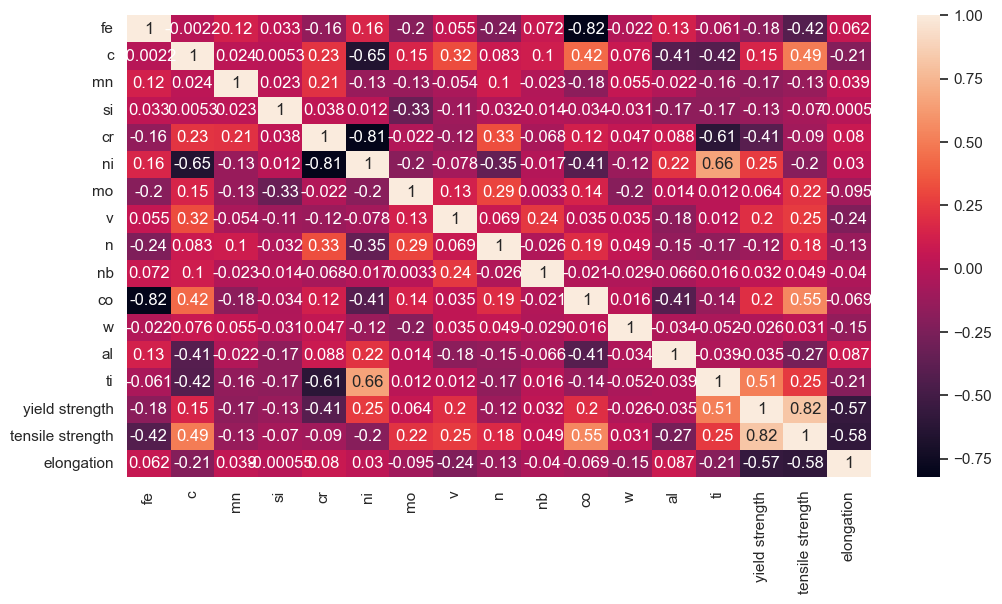

In [10]:
ssd=ss.drop(['formula'], axis=1)
plt.figure(figsize=(12,6))
sns.heatmap(ssd.corr(), annot=True)
plt.show()

In [11]:
plt.tight_layout()


<Figure size 640x480 with 0 Axes>

In [12]:
plt.savefig('heatmap.png')

<Figure size 640x480 with 0 Axes>

In [13]:
plt.show()

In [14]:
#sns.pairplot(ssd)

## Predicting Yield Strength

In [15]:
X = ssd.drop(['yield strength', 'tensile strength','elongation'],axis=1)
y = ssd['yield strength']

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

In [17]:
poly_converter = PolynomialFeatures(degree=2,include_bias=False)

In [18]:
poly_features = poly_converter.fit_transform(X)

In [19]:
poly_features.shape

(312, 119)

In [20]:
X.iloc[0]

fe    60.50
c      0.02
mn     0.05
si     0.05
cr     0.01
ni    19.70
mo     2.95
v      0.01
n      0.00
nb     0.01
co    15.00
w      0.00
al     0.15
ti     1.55
Name: 0, dtype: float64

In [21]:
poly_features[0]

array([6.05000e+01, 2.00000e-02, 5.00000e-02, 5.00000e-02, 1.00000e-02,
       1.97000e+01, 2.95000e+00, 1.00000e-02, 0.00000e+00, 1.00000e-02,
       1.50000e+01, 0.00000e+00, 1.50000e-01, 1.55000e+00, 3.66025e+03,
       1.21000e+00, 3.02500e+00, 3.02500e+00, 6.05000e-01, 1.19185e+03,
       1.78475e+02, 6.05000e-01, 0.00000e+00, 6.05000e-01, 9.07500e+02,
       0.00000e+00, 9.07500e+00, 9.37750e+01, 4.00000e-04, 1.00000e-03,
       1.00000e-03, 2.00000e-04, 3.94000e-01, 5.90000e-02, 2.00000e-04,
       0.00000e+00, 2.00000e-04, 3.00000e-01, 0.00000e+00, 3.00000e-03,
       3.10000e-02, 2.50000e-03, 2.50000e-03, 5.00000e-04, 9.85000e-01,
       1.47500e-01, 5.00000e-04, 0.00000e+00, 5.00000e-04, 7.50000e-01,
       0.00000e+00, 7.50000e-03, 7.75000e-02, 2.50000e-03, 5.00000e-04,
       9.85000e-01, 1.47500e-01, 5.00000e-04, 0.00000e+00, 5.00000e-04,
       7.50000e-01, 0.00000e+00, 7.50000e-03, 7.75000e-02, 1.00000e-04,
       1.97000e-01, 2.95000e-02, 1.00000e-04, 0.00000e+00, 1.000

## Train Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=1/3, random_state=100)

In [23]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [24]:
model.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [27]:
MAE = mean_absolute_error(y_test,y_pred)
MAE

724.3955424459223

In [28]:
MSE = mean_squared_error(y_test,y_pred)
MSE

11590101.237370906

In [29]:
RMSE = np.sqrt(MSE)
RMSE

3404.423774645411

In [30]:
model.coef_

array([-4.87153697e+02, -5.75204364e+02, -8.26690091e+02, -2.54031443e+02,
       -4.93600496e+02, -4.89965698e+02, -4.36344571e+02, -4.01120834e+02,
        2.78415406e+03,  2.76668760e+03, -4.99595696e+02, -2.86229591e+02,
       -6.41775225e+02, -1.59129949e+02, -1.79953905e+03, -3.48957218e+03,
       -3.62167759e+03, -3.57322110e+03, -3.59570009e+03, -3.59480025e+03,
       -3.59621492e+03, -3.59739275e+03, -3.73815965e+03, -3.71218741e+03,
       -3.59923680e+03, -3.59539343e+03, -3.59551789e+03, -3.60675617e+03,
       -9.40768200e+03, -1.52751073e+03, -7.60891587e+03, -3.88781658e+03,
       -3.83699996e+03, -3.45746969e+03, -3.40583365e+03, -1.05397301e+04,
        1.54020897e+04, -3.58250518e+03,  3.58491695e+02, -1.49169010e+04,
       -7.62008084e+03, -1.50054175e+03, -6.11247943e+03, -3.51118564e+03,
       -3.48961795e+03, -3.63784651e+03, -3.91637596e+03, -1.21771425e+04,
       -3.28371879e+04, -3.48840708e+03, -2.28690706e+03, -3.58033575e+03,
       -9.81793446e+02, -

## Choosing a degree

In [31]:
train_rmse_error = []
test_rmse_error = []

for d in range(1,10):
    
    #create poly dataset for degree 'd'
    
    poly_conv = PolynomialFeatures(degree=d,include_bias=False)
    poly_feat = poly_conv.fit_transform(X)
    
    #Split new poly dataset
    X_train, X_test, y_train, y_test = train_test_split(poly_feat,y,test_size=1/3, random_state=50)
    
    #Train on this poly set
    mod = LinearRegression(fit_intercept=True)
    mod.fit(X_train,y_train)
    
    #Predict on both train and test set
    train_pred = mod.predict(X_train)
    test_pred = mod.predict(X_test)
    
    #Errors
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

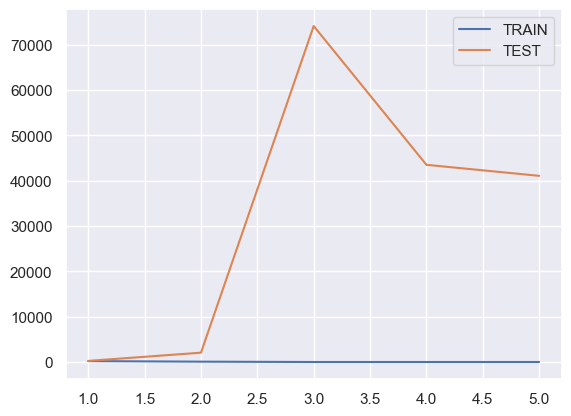

In [32]:
plt.plot(range(1,6),train_rmse_error[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_error[:5],label='TEST')
plt.legend()
plt.savefig('liner_reg-VS-poly_Reg.png')

#### To conclude we can hence the linear model is the best fit model for the case as we as the Degree of the polynomial increases, 
#### The differece between the train set prediction and test set prediction also increases 

## Final Model Choice

In [33]:
final_poly_conv = PolynomialFeatures(degree=1,include_bias=False)
final_model = LinearRegression()
final_poly_feat = final_poly_conv.fit_transform(X)
final_model.fit(final_poly_feat,y)

LinearRegression()

In [34]:
final_model.coef_

array([-8.96319267e+11, -8.96319266e+11, -8.96319267e+11, -8.96319267e+11,
       -8.96319267e+11, -8.96319267e+11, -8.96319267e+11, -8.96319267e+11,
       -8.96319267e+11, -8.96319267e+11, -8.96319267e+11, -8.96319267e+11,
       -8.96319267e+11, -8.96319267e+11])

In [35]:
from joblib import dump, load
dump(final_model,'ys_poly_model.joblib')
dump(final_poly_conv,'ys_poly_conv.joblib')

['ys_poly_conv.joblib']

In [36]:
loaded_poly = load('ys_poly_conv.joblib')
loaded_model = load('ys_poly_model.joblib')

In [37]:
new_ys = [[37.625,0.025,1,0.5,12.75,36,8,0,0,0,0,0,1.15,2.95]]
poly_new_ys = loaded_poly.transform(new_ys)
poly_new_ys

array([[3.7625e+01, 2.5000e-02, 1.0000e+00, 5.0000e-01, 1.2750e+01,
        3.6000e+01, 8.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.1500e+00, 2.9500e+00]])

In [38]:
final_model.predict(poly_new_ys)

array([2678.453125])

## we can conclude that linear regression is best for the given data set

In [39]:
import pandas as pd

# Create a DataFrame
data = {
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
}
df = pd.DataFrame(data)

# Sum of a specific row (e.g., second row)
row_index = 1
row_sum = df.iloc[row_index].sum()
print(f"Sum of row {row_index}: {row_sum}")

# Compute the sum for each row and add as a new column
df['Row Sum'] = df.sum(axis=1)
print("DataFrame with Row Sums:")
print(df)


Sum of row 1: 15
DataFrame with Row Sums:
   A  B  C  Row Sum
0  1  4  7       12
1  2  5  8       15
2  3  6  9       18
